In [21]:
import tensorflow as tf
import numpy as np

x_train = np.arange(10).reshape((10, 1))
y_train = (2 * x_train ** 2 + 3 * x_train  +  1).astype(np.float32)
x_train_norm = ((x_train - np.mean(x_train)) / np.std(x_train)).astype(np.float32)

In [40]:
class  LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.w1 = tf.Variable(initial_value=tf.random.normal(shape=(1,)), trainable=True, name='w1')
        self.w2 = tf.Variable(initial_value=tf.random.normal(shape=(1,)), trainable=True, name='w2')
        self.b = tf.Variable(initial_value=tf.random.normal(shape=(1,)), trainable=True, name='b')

    def call(self, inputs):
        return self.w2 * inputs ** 2 + self.w1 * inputs + self.b


In [45]:
tf.random.set_seed(42)

model = LinearRegressionModel()
model.build(input_shape=(None,1))
model.summary()

Model: "linear_regression_model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dw1, dw2, db = tape.gradient(current_loss, [model.w1, model.w2, model.b])
    model.w1.assign_sub(learning_rate * dw1)
    model.w2.assign_sub(learning_rate * dw2)
    model.b.assign_sub(learning_rate * db)


In [46]:
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
ds = ds.shuffle(len(y_train))
ds = ds.repeat()
ds = ds.batch(batch_size) 

W1s, W2s, Bs = [], [], []

for i, (x, y) in enumerate(ds):
    if i >= steps_per_epoch * num_epochs:
        break
    W1s.append(model.w1.numpy())
    W2s.append(model.w2.numpy())
    Bs.append(model.b.numpy())

    loss = loss_fn(y, model(x))

    train(model, x, y, learning_rate=learning_rate)
    if i % log_steps == 0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss))


Epoch    0 Step  0 Loss 249.0184
Epoch   10 Step 100 Loss 11731.4688
Epoch   20 Step 200 Loss 836.7175
Epoch   30 Step 300 Loss 2069.5696
Epoch   40 Step 400 Loss 21.7583
Epoch   50 Step 500 Loss 1564.0953
Epoch   60 Step 600 Loss 341.9055
Epoch   70 Step 700 Loss 1056.8251
Epoch   80 Step 800 Loss 409.7208
Epoch   90 Step 900 Loss 378.6242
Epoch  100 Step 1000 Loss 306.4565
Epoch  110 Step 1100 Loss 65.5580
Epoch  120 Step 1200 Loss 42.6106
Epoch  130 Step 1300 Loss 151.2583
Epoch  140 Step 1400 Loss 7.3615
Epoch  150 Step 1500 Loss 154.8575
Epoch  160 Step 1600 Loss 59.4354
Epoch  170 Step 1700 Loss 100.5767
Epoch  180 Step 1800 Loss 36.9073
Epoch  190 Step 1900 Loss 45.1525


In [47]:
x_test = np.linspace(0,9, num=100)
x_test_norm = ((x_test - np.mean(x_test)) / np.std(x_test)).astype(np.float32)
y_pred = model(x_test_norm)


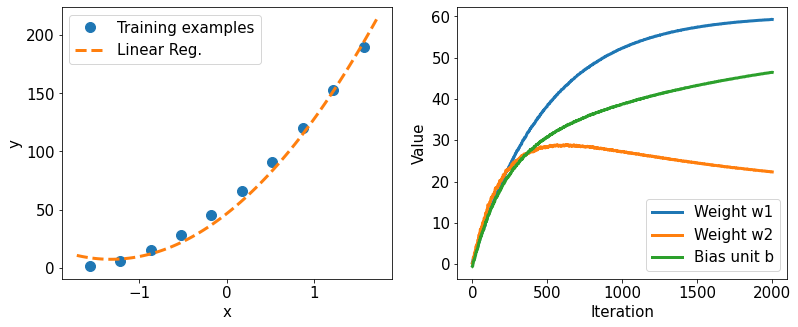

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(x_train_norm, y_train, 'o', markersize=10)
plt.plot(x_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(W1s, lw=3)
plt.plot(W2s, lw=3)
plt.plot(Bs, lw=3)
plt.legend(['Weight w1','Weight w2', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('ch13-linreg-1.pdf')

plt.show()

In [54]:
model_keras_fit = LinearRegressionModel()
model_keras_fit.build(input_shape=(None,1))
model_keras_fit.summary()

Model: "linear_regression_model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
W1s, W2s, Bs = [], [], []
class CustomCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        model = self.model
        W1s.append(model.w1.numpy())
        W2s.append(model.w2.numpy())
        Bs.append(model.b.numpy())

In [64]:
model_keras_fit.compile(optimizer='sgd', loss="mean_squared_error")
history = model_keras_fit.fit(ds, epochs=num_epochs, steps_per_epoch=int(len(y_train) / batch_size), callbacks=[CustomCallback()])

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 4.0149e-09
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 4.2244e-09
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 4.2477e-09
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 4.1895e-09
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 4.2244e-09
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 4.0382e-09
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 4.1895e-09
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 4.0149e-09
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 4.2244e-09
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 4.1895e-09
Epoch 11/200
10/10 [==============================] - 0s 1ms/step - loss: 4.0149e-09
Epoch 12/200
10/10 [==============================] - 0s 1ms/step - loss: 

In [59]:
y_pred_keras_fit = model_keras_fit(x_test_norm)

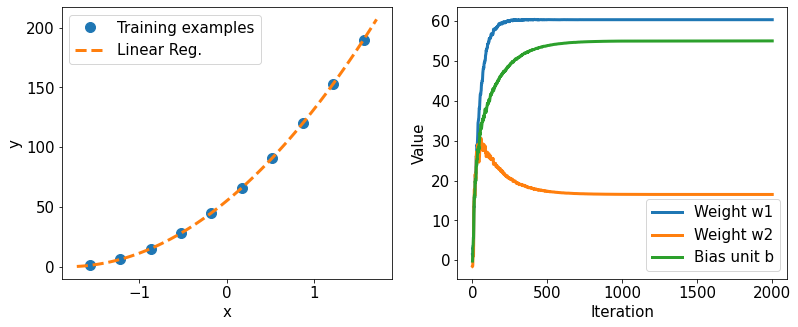

In [60]:
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(x_train_norm, y_train, 'o', markersize=10)
plt.plot(x_test_norm, y_pred_keras_fit, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(W1s, lw=3)
plt.plot(W2s, lw=3)
plt.plot(Bs, lw=3)
plt.legend(['Weight w1','Weight w2', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('ch13-linreg-1.pdf')

plt.show()